<a href="https://colab.research.google.com/github/Anshu-Rajpoot/Data_Analysis/blob/main/Books_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📌 Objective:
Scrape book details (title, price, rating, and stock status) from Books to Scrape and analyze pricing trends.

Scrape Book Details

Cleaned Data:
                                    Title  Price     Stock  Rating
0                   A Light in the Attic  51.77  In stock       3
1                     Tipping the Velvet  53.74  In stock       1
2                             Soumission  50.10  In stock       1
3                          Sharp Objects  47.82  In stock       4
4  Sapiens: A Brief History of Humankind  54.23  In stock       5


<ipython-input-16-12eefe90dd7e>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_counts.index, y=stock_counts.values, palette="coolwarm")


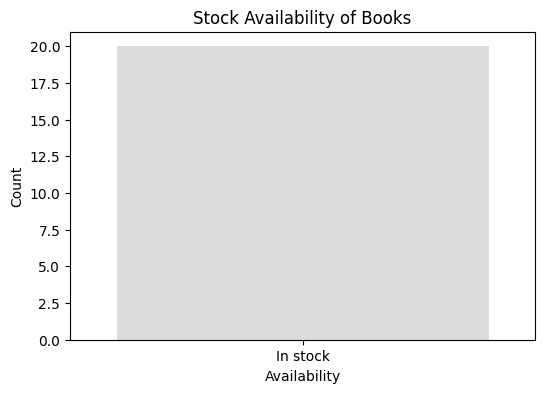

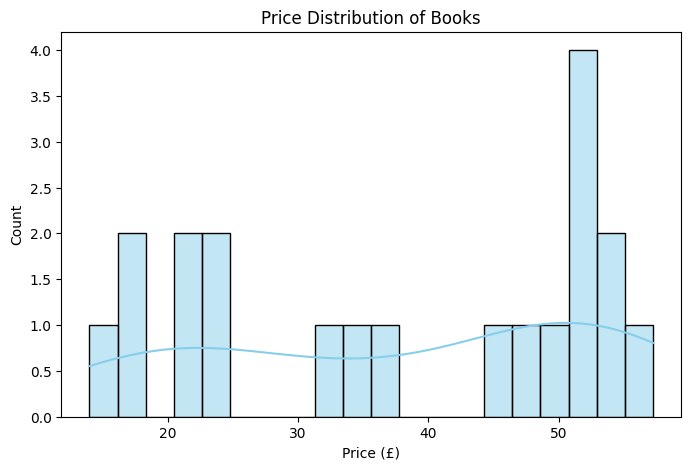

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# URL of the static website
url = "https://books.toscrape.com/catalogue/page-1.html"

# Send a request
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract book data
books = soup.find_all("article", class_="product_pod")

book_list = []
for book in books:
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    stock = book.find("p", class_="instock availability").text.strip()
    rating = book.p["class"][1]  # Rating is stored in a class attribute

    book_list.append([title, price, stock, rating])

# Convert to DataFrame
df = pd.DataFrame(book_list, columns=["Title", "Price", "Stock", "Rating"])

# Fix encoding issues
df["Price"] = df["Price"].apply(lambda x: re.sub(r"[^0-9.]", "", x)).astype(float)

# Convert ratings from words to numbers
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)

# Save cleaned data
df.to_csv("cleaned_books_data.csv", index=False)
print("Cleaned Data:\n", df.head())

# --- Visualization ---
#stock availability
stock_counts = df["Stock"].value_counts()

# Plot stock availability
plt.figure(figsize=(6, 4))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette="coolwarm")
plt.title("Stock Availability of Books")
plt.xlabel("Availability")
plt.ylabel("Count")
plt.show()

# Plot price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=20, kde=True, color="skyblue")
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()
